In [18]:
# import necessary libaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline

In [19]:
# import dataset
df = pd.read_csv('delivery_time.csv')

In [20]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [22]:
df = df.rename({'Delivery Time': 'delivery_time', 'Sorting Time': 'sorting_time' }, axis=1)
df = df.astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   delivery_time  21 non-null     float64
 1   sorting_time   21 non-null     float64
dtypes: float64(2)
memory usage: 468.0 bytes


In [23]:
df[df.duplicated()]

,delivery_time,sorting_time


In [24]:
df.describe()

,delivery_time,sorting_time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [25]:
df.corr()

,delivery_time,sorting_time
delivery_time,1.000000,0.825997
sorting_time,0.825997,1.000000


<Axes: >

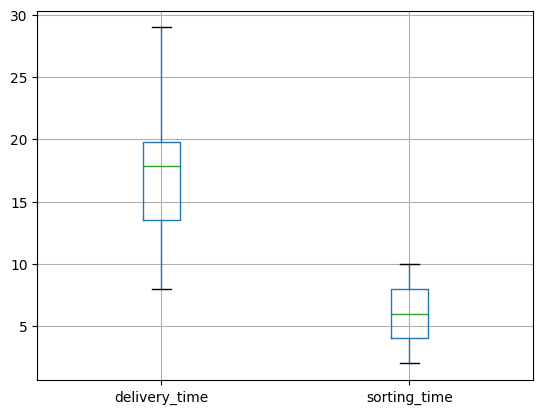

In [26]:
df.boxplot()

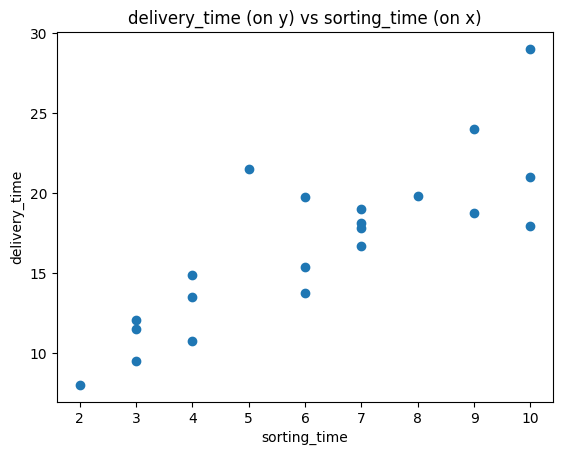

In [27]:
plt.scatter(df['sorting_time'], df['delivery_time'])
plt.xlabel('sorting_time')
plt.ylabel('delivery_time')
plt.title('delivery_time (on y) vs sorting_time (on x)')
plt.show()

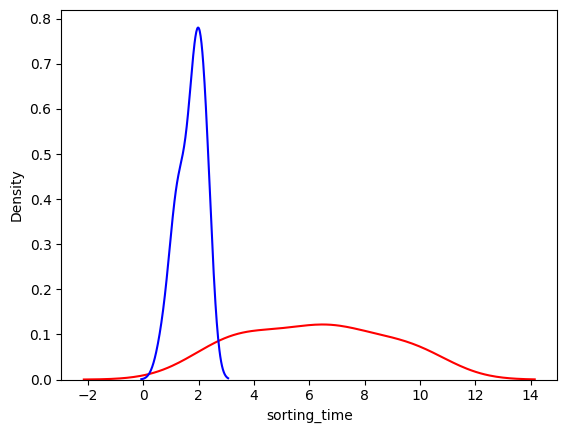

In [28]:
sns.kdeplot(df['sorting_time'], color='r')
sns.kdeplot(np.log(df['sorting_time']), color='b')
plt.show()

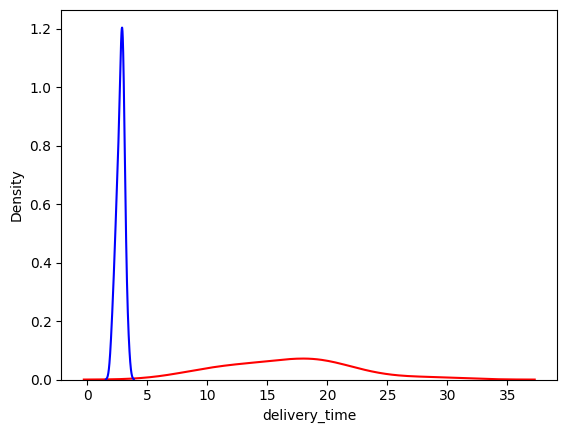

In [29]:
sns.kdeplot(df['delivery_time'], color='r')
sns.kdeplot(np.log(df['delivery_time']), color='b')
plt.show()

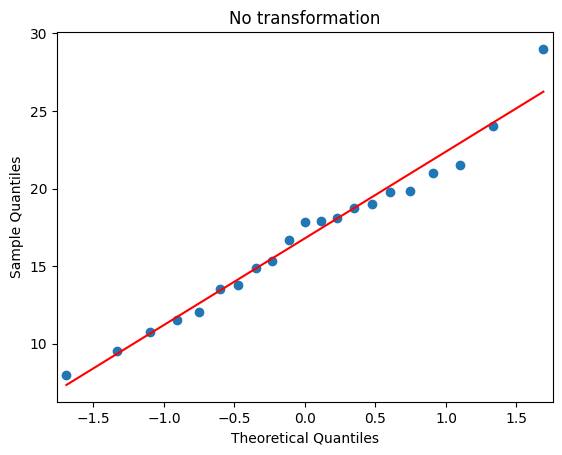

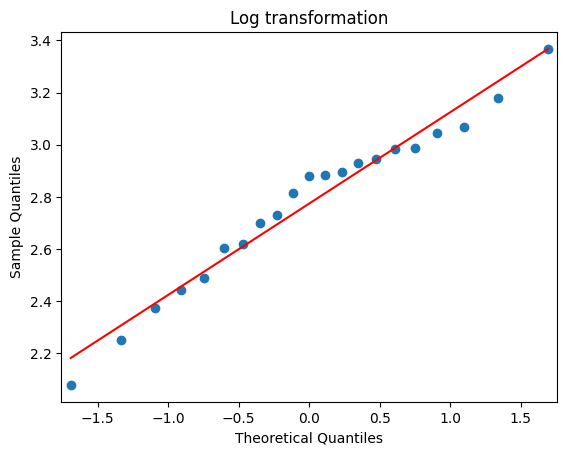

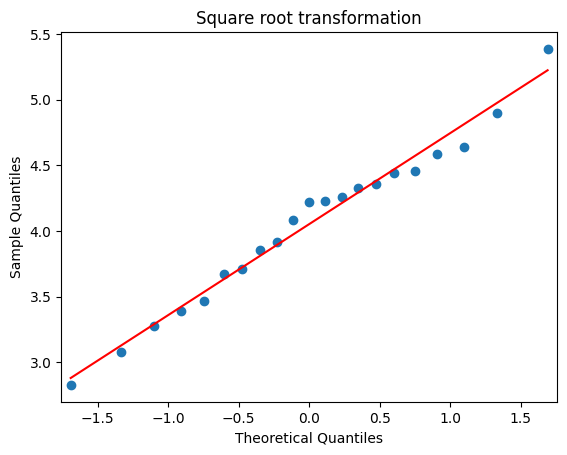

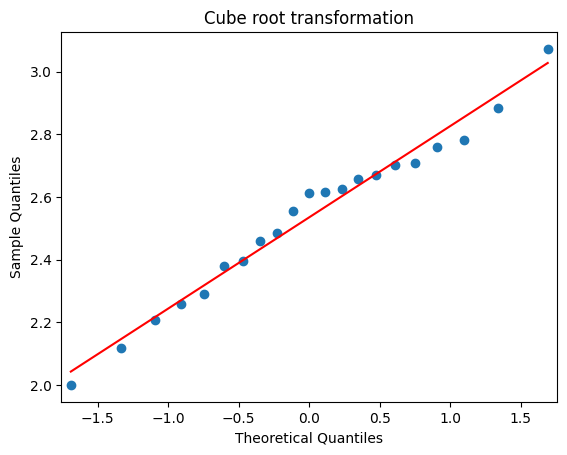

In [30]:
sm.qqplot(df['delivery_time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(df['delivery_time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(df['delivery_time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(df['delivery_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

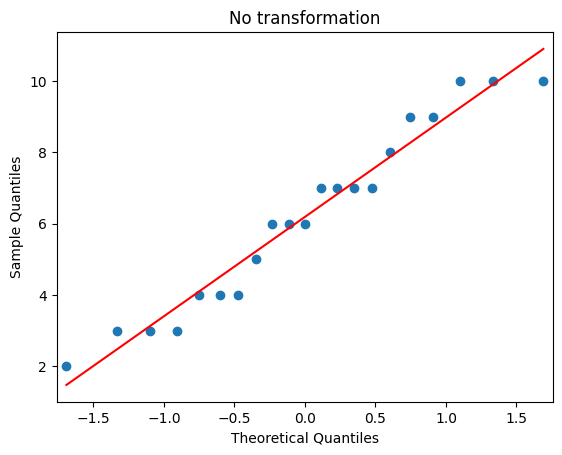

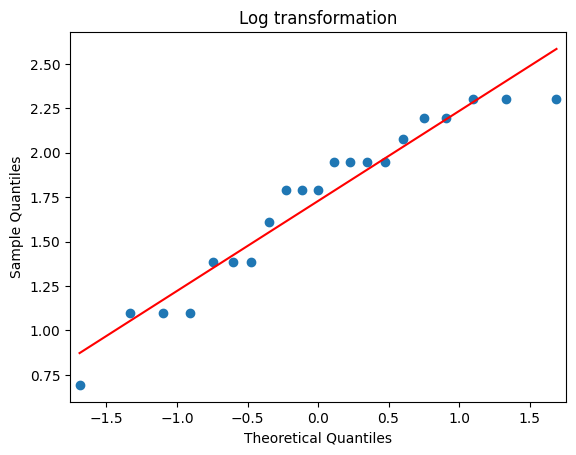

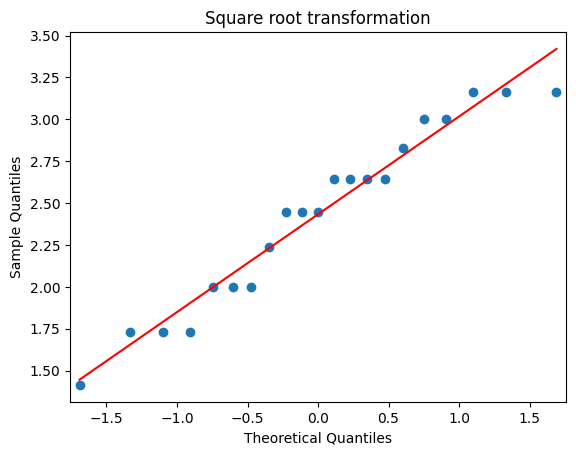

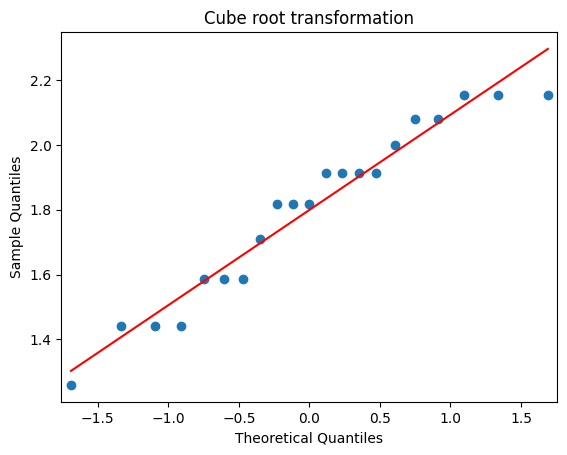

In [31]:
sm.qqplot(df['sorting_time'], line = 'r')
plt.title('No transformation')
sm.qqplot(np.log(df['sorting_time']), line = 'r')
plt.title('Log transformation')
sm.qqplot(np.sqrt(df['sorting_time']), line = 'r')
plt.title('Square root transformation')
sm.qqplot(np.cbrt(df['sorting_time']), line = 'r')
plt.title('Cube root transformation')
plt.show()

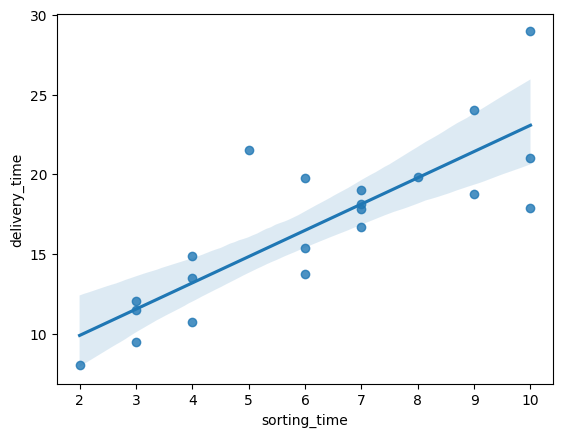

In [32]:
sns.regplot(data=df, x= df['sorting_time'], y= df['delivery_time'], scatter=True, fit_reg=True)
plt.show()

# ##############################################################

In [33]:
import numpy as np
from sklearn.linear_model import LinearRegression

In [34]:
x=df['sorting_time']
x=np.array(x).reshape((-1,1))
x

array([[10.],
       [ 4.],
       [ 6.],
       [ 9.],
       [10.],
       [ 6.],
       [ 7.],
       [ 3.],
       [10.],
       [ 9.],
       [ 8.],
       [ 4.],
       [ 7.],
       [ 3.],
       [ 3.],
       [ 4.],
       [ 6.],
       [ 7.],
       [ 2.],
       [ 7.],
       [ 5.]])

In [35]:
y = df['delivery_time']
y=np.array(y)
y

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

In [36]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [37]:
model = LinearRegression().fit(x, y)

In [38]:
r_sq = model.score(x,y)
print(f'coefficient of determination: {r_sq}')

coefficient of determination: 0.6822714748417231


In [39]:
print(f"intercept: {model.intercept_}")

print(f"slope: {model.coef_}")

intercept: 6.58273397199706
slope: [1.6490199]


In [40]:
#new_model = LinearRegression().fit(x, y.reshape((-1, 1)))
#print(f"intercept: {new_model.intercept_}")
#print(f"slope: {new_model.coef_}")

In [41]:
y_pred = model.predict(x)
print(f"predicted response:\n{y_pred}")

predicted response:
[23.07293294 13.17881356 16.47685335 21.42391304 23.07293294 16.47685335
 18.12587325 11.52979366 23.07293294 21.42391304 19.77489315 13.17881356
 18.12587325 11.52979366 11.52979366 13.17881356 16.47685335 18.12587325
  9.88077377 18.12587325 14.82783346]


In [42]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response:\n{y_pred}")

predicted response:
[[23.07293294]
 [13.17881356]
 [16.47685335]
 [21.42391304]
 [23.07293294]
 [16.47685335]
 [18.12587325]
 [11.52979366]
 [23.07293294]
 [21.42391304]
 [19.77489315]
 [13.17881356]
 [18.12587325]
 [11.52979366]
 [11.52979366]
 [13.17881356]
 [16.47685335]
 [18.12587325]
 [ 9.88077377]
 [18.12587325]
 [14.82783346]]


In [43]:
x_new = np.arange(4,8).reshape((-1, 1))
print(x_new)

y_new = model.predict(x_new)
print(y_new)

[[4]
 [5]
 [6]
 [7]]
[13.17881356 14.82783346 16.47685335 18.12587325]


# ############################################

# ######################################
## Linear Regression using Statsmodels library, ols technique


In [52]:
#using statsmodels library

import statsmodels.formula.api as smf

In [53]:
smfmodel = smf.ols('delivery_time~sorting_time', data=df).fit()

In [54]:
smfmodel.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        16:33:48   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [55]:
x_new = pd.DataFrame(np.array([4.0,6.0,8.0]), columns=['sorting_time'])
x_new

y_new = smfmodel.predict(x_new)
y_new

0    13.178814
1    16.476853
2    19.774893
dtype: float64

In [56]:
# split the orginal dataset into train and test sets

In [57]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, 
                            test_size=0.2, random_state=42) 

In [58]:
from sklearn.linear_model import LinearRegression  
model2 = LinearRegression()  
model2.fit(x_train, y_train) 

LinearRegression()

In [59]:
y_pred = model2.predict(x_test)
y_pred

array([24.9247435 , 18.85200984, 12.77927618, 12.77927618, 24.9247435 ])

In [60]:
df_pred = pd.DataFrame({'actual': y_test, 'pred':y_pred})
df_pred

,actual,pred
0,21.00,24.924743
1,18.11,18.852010
2,14.88,12.779276
3,13.50,12.779276
4,17.90,24.924743


In [61]:
# The coefficients
print("Coefficients: \n", model2.coef_)
print('\n')
# The interceept
print('Intercepts: \n', model2.intercept_)
print('\n')
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('\n')
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Coefficients: 
 [2.02424455]


Intercepts: 
 4.682297962052003


Mean squared error: 14.05


Coefficient of determination: -1.02


In [99]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

X, y = df[['sorting_time']], df[['delivery_time']]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(X_train, y_train)  # apply scaling on training data

pipe.score(X_test, y_test)  # apply scaling on testing data, without leaking training data.

-1.0037521141687815

In [100]:
y_pred = pipe.predict(X_test)
y_pred

array([[25.02776612],
       [18.95170915],
       [12.87565217],
       [12.87565217],
       [25.02776612],
       [16.92635682]])

In [102]:
# The coefficients
#print("Coefficients: \n", pipe.coef_)
#print('\n')
# The interceept
#print('Intercepts: \n', pipe.intercept_)
#print('\n')
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
print('\n')
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))


Mean squared error: 12.44


Coefficient of determination: -1.00


# Apply tranformations

In [66]:
#logarithmic

model_log = smf.ols('np.log(delivery_time)~np.log(sorting_time)',data=df).fit()
model_log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     np.log(delivery_time)   R-squared:                       0.772
Model:                               OLS   Adj. R-squared:                  0.760
Method:                    Least Squares   F-statistic:                     64.39
Date:                   Sun, 04 Feb 2024   Prob (F-statistic):           1.60e-07
Time:                           16:33:49   Log-Likelihood:                 10.291
No. Observations:                     21   AIC:                            -16.58
Df Residuals:                         19   BIC:                            -14.49
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                1.7420      0.133     13.086      0.000       1.463       2.021
np.log(sorting_time)     0.5975      0.074      8.024      0.000       0.442       0.753
==============================================================================
Omnibus:                        1.871   Durbin-Watson:                   1.322
Prob(Omnibus):                  0.392   Jarque-Bera (JB):                1.170
Skew:                           0.577   Prob(JB):                        0.557
Kurtosis:                       2.916   Cond. No.                         9.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

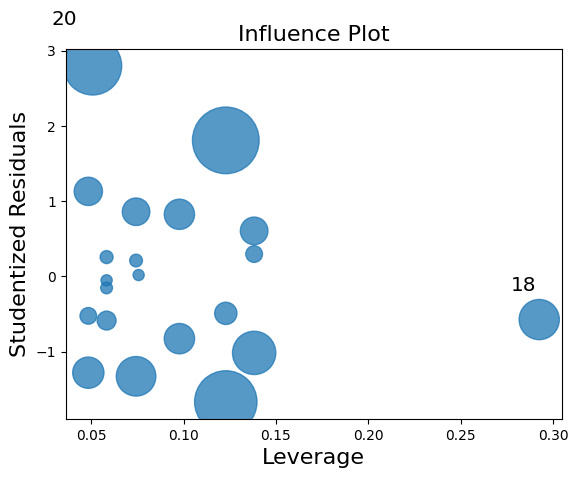

In [67]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_log)
plt.show()

In [68]:
# Cooks distance to detect outlier
from statsmodels.graphics.regressionplots import influence_plot
model_influence = model_log.get_influence()
(c, _) = model_influence.cooks_distance

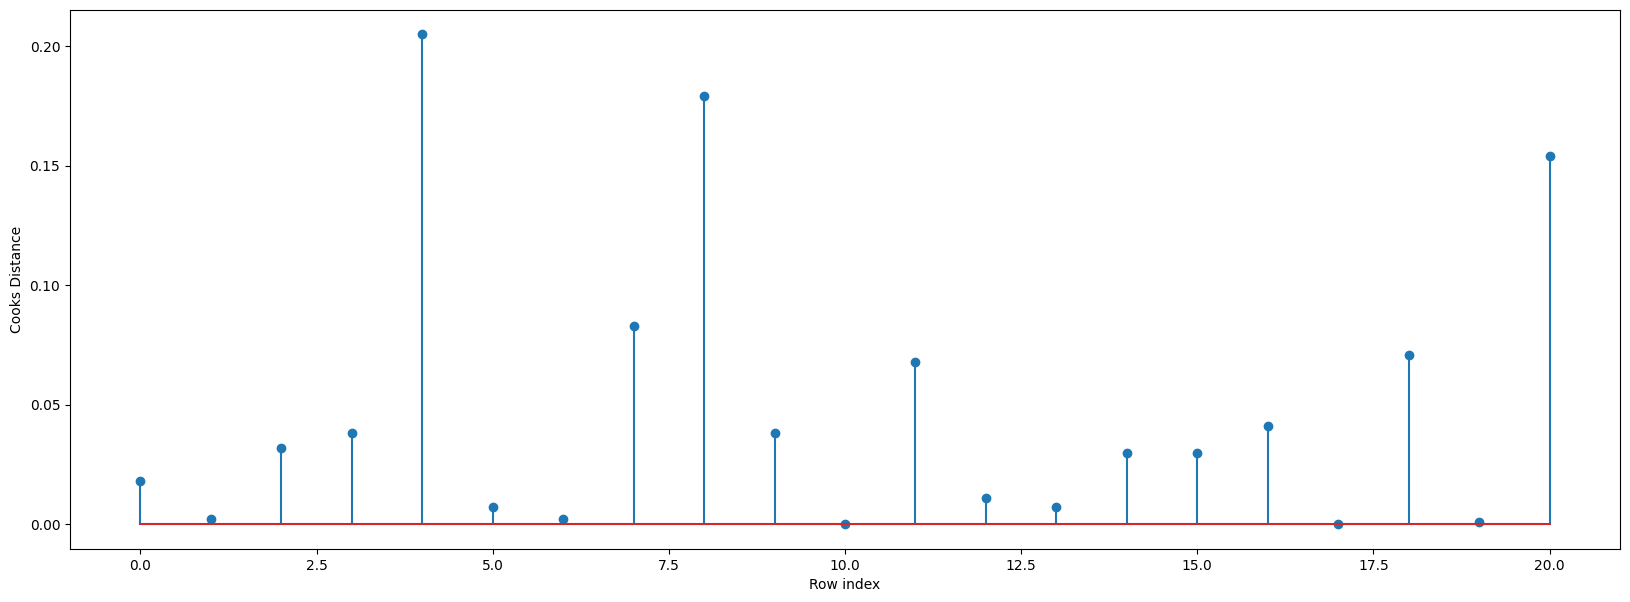

In [69]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(df)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [70]:
(np.argmax(c),np.max(c))

(4, 0.20461903316033186)

In [71]:
df_new=pd.read_csv('delivery_time.csv')

In [72]:
df_new1=df_new.drop(df_new.index[[8,20,4]],axis=0).reset_index()

In [73]:
df_new1.head()

,index,Delivery Time,Sorting Time
0,0,21.00,10
1,1,13.50,4
2,2,19.75,6
3,3,24.00,9
4,5,15.35,6


In [74]:
data1=df_new1.rename(columns={"Delivery Time":"Delivery_time","Sorting Time":"Sorting_time"})

In [75]:
model_new=smf.ols('Delivery_time~Sorting_time',data=data1).fit()

In [76]:
model_new.rsquared

0.8332330202945817

In [77]:
(model_new.rsquared,model_new.aic)

(0.8332330202945817, 74.89939393823053)

# ##################################################################################

In [78]:
import numpy as np
from sklearn.preprocessing import QuantileTransformer
df=pd.read_csv('delivery_time.csv')

qt = QuantileTransformer(n_quantiles=10, random_state=0)
qt_df=qt.fit_transform(df)
qt_df = pd.DataFrame(data =qt_df, columns= ['delivery_time', 'sorting_time'])
qt_df

,delivery_time,sorting_time
0,0.861789,1.000000
1,0.272080,0.222222
2,0.772640,0.444444
3,0.927007,0.818182
4,1.000000,1.000000
5,0.379701,0.444444
6,0.685934,0.611111
7,0.057143,0.111111
8,0.553692,1.000000
9,0.656492,0.818182


In [79]:
X=qt_df[['delivery_time']].values
y=qt_df['sorting_time'].values

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [81]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(X_train, y_train) 

LinearRegression()

<Axes: xlabel='sorting_time', ylabel='delivery_time'>

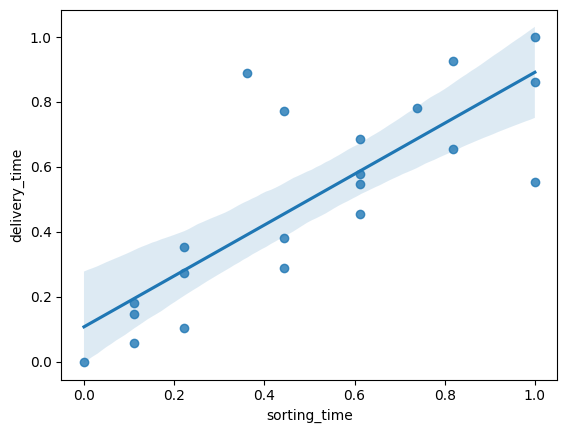

In [82]:
# Plotting the regression line
sns.regplot(data = qt_df, x="sorting_time", y="delivery_time")

In [83]:
# predictions using x_test
y_pred = model.predict(X_test)
y_pred

array([0.74094709, 0.52373937, 0.35178674, 0.28903894, 0.5048451 ,
       0.3715114 , 0.16081922])

In [84]:
# Comparing Actual vs Predicted
compare_df= pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})  
compare_df

,Actual,Predicted
0,1.000000,0.740947
1,0.611111,0.523739
2,0.222222,0.351787
3,0.222222,0.289039
4,1.000000,0.504845
5,0.444444,0.371511
6,0.222222,0.160819


In [85]:
from sklearn import metrics  
print('Mean Absolute Error:', 
      metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:',
        metrics.mean_squared_error(y_test, y_pred))
print('R_Squared score(test):',
        metrics.r2_score(y_test, y_pred))

Mean Absolute Error: 0.16747097704700972
Mean Squared Error: 0.05003737163900648
R_Squared score(test): 0.5265832466383391


In [87]:
print('model_plain:')
model_plain = smf.ols('delivery_time~sorting_time',data=df).fit()
print(model_plain.summary())
print('\n')
print('model_log_ip:')
model_log_ip = smf.ols('delivery_time~np.log(sorting_time)',data=df).fit()
print(model_log_ip.summary())
print('\n')
print('model_exp:')
model_exp = smf.ols('delivery_time~np.exp(sorting_time)',data=df).fit()
print(model_exp.summary())
print('\n')
print('model_reciprocal:')
model_reciprocal = smf.ols('delivery_time~np.reciprocal(sorting_time)',data=df).fit()
print(model_reciprocal.summary())
print('\n')
print('model_sqrt:')
model_sqrt = smf.ols('delivery_time~np.sqrt(sorting_time)',data=df).fit()
print(model_sqrt.summary())
print('\n')
print('model_log_op:')
model_log_op = smf.ols('np.log(delivery_time)~sorting_time',data=df).fit()
print(model_log_op.summary())
print('\n')
print('model_log_io:')
model_log_io = smf.ols('np.log(delivery_time)~np.log(sorting_time)',data=df).fit()
print(model_log_io.summary())
print('\n')

model_plain:
                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           3.98e-06
Time:                        16:33:51   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722 

C:\Users\venka\DataScience\mywork\Lib\site-packages\statsmodels\regression\linear_model.py:1966: RuntimeWarning: divide by zero encountered in scalar divide
  return np.sqrt(eigvals[0]/eigvals[-1])


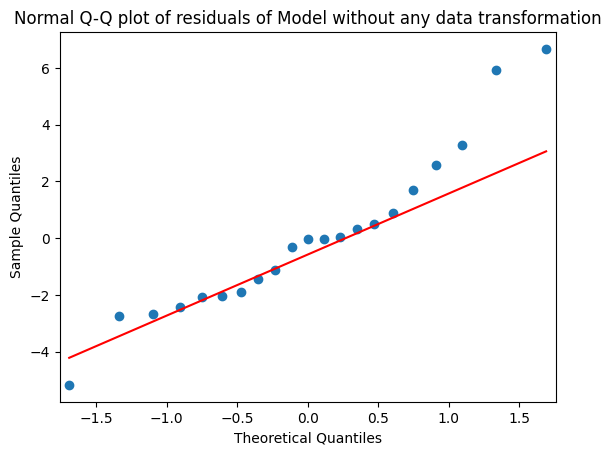

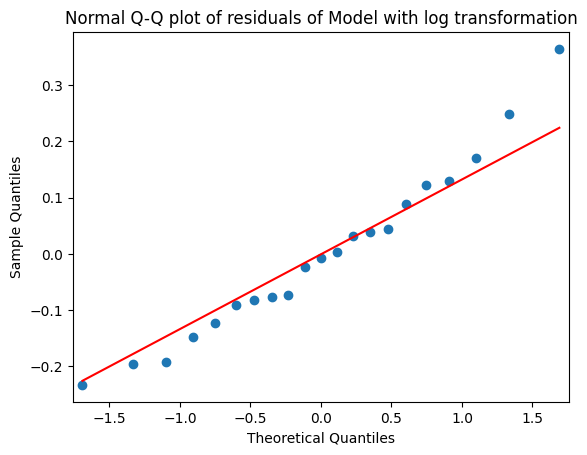

In [88]:
sm.qqplot(model_plain.resid,line='q')
plt.title('Normal Q-Q plot of residuals of Model without any data transformation')
sm.qqplot(model_log_io.resid,line='q')
plt.title('Normal Q-Q plot of residuals of Model with log transformation')
plt.show()

In [89]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

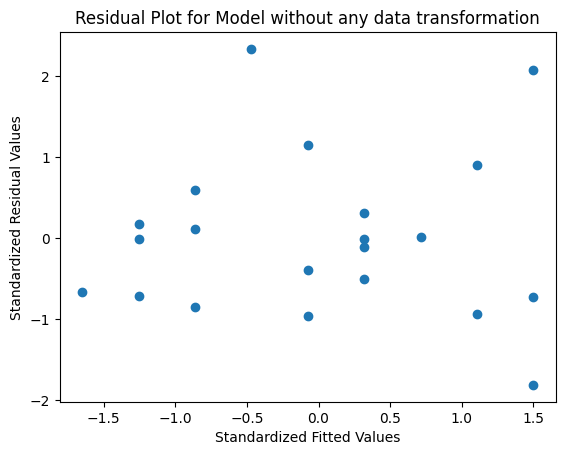

In [90]:
plt.scatter(get_standardized_values(model_plain.fittedvalues), get_standardized_values(model_plain.resid))
plt.title('Residual Plot for Model without any data transformation')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')
plt.show()

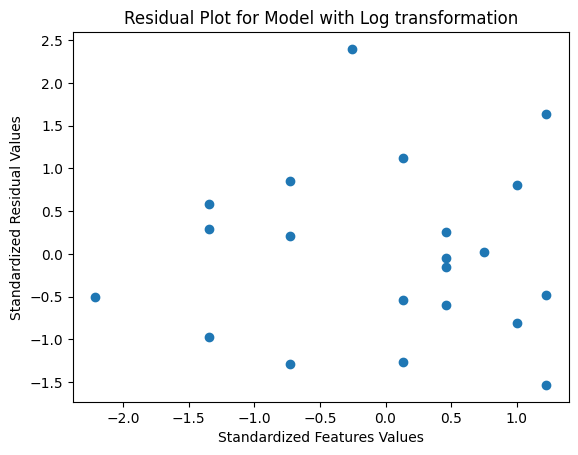

In [91]:
plt.scatter(get_standardized_values(model_log_io.fittedvalues), get_standardized_values(model_log_io.resid))
plt.title('Residual Plot for Model with Log transformation')
plt.xlabel('Standardized Features Values')
plt.ylabel('Standardized Residual Values')
plt.show()

In [92]:
df['sorting_time_sqr']= df['sorting_time']**2

print('model_quad:')
model_quad = smf.ols('delivery_time~sorting_time+sorting_time_sqr',data=df).fit()
print(model_quad.summary())
print('\n')

model_quad:
                            OLS Regression Results                            
Dep. Variable:          delivery_time   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.659
Method:                 Least Squares   F-statistic:                     20.36
Date:                Sun, 04 Feb 2024   Prob (F-statistic):           2.39e-05
Time:                        16:33:52   Log-Likelihood:                -50.981
No. Observations:                  21   AIC:                             108.0
Df Residuals:                      18   BIC:                             111.1
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.5222 

In [93]:
from sklearn.metrics import mean_squared_error

pred_model_quad = model_quad.predict(df[['sorting_time', 'sorting_time_sqr']])
mse_model_quad = mean_squared_error(pred_model_quad,df['delivery_time'])
mse_model_quad

7.519376771494548

In [94]:
pred_model_plain = model_plain.predict(df['sorting_time'])
mse_model_plain = mean_squared_error(pred_model_plain,df['delivery_time'])
print('mse_model_plain:', mse_model_plain)
print('rmse_model_plain:', mse_model_plain**0.5)

mse_model_plain: 7.793311548584062
rmse_model_plain: 2.7916503270617654


# import statsmodels.api as sm

In [95]:
import statsmodels.api as sm
print('\n sm_plain')
sm_plain = sm.OLS(df['delivery_time'], df['sorting_time']).fit()
sm_plain_pred = sm_plain.predict(df['sorting_time'])
print(sm_plain.summary())
print('\n')


 sm_plain
                                 OLS Regression Results                                
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.955
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              424.5
Date:                Sun, 04 Feb 2024   Prob (F-statistic):                    6.12e-15
Time:                        16:33:52   Log-Likelihood:                         -57.349
No. Observations:                  21   AIC:                                      116.7
Df Residuals:                      20   BIC:                                      117.7
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                   coef    std err          t      P>|t|      [0.025      0.975]
----------------------------

In [96]:
print('\n sm_log_ip')
df['sorting_time_log'] = np.log(df['sorting_time'])
sm_log_ip = sm.OLS(df['delivery_time'], df['sorting_time_log']).fit()
sm_log_ip_pred = sm_log_ip.predict(df['sorting_time_log'])
print(sm_log_ip.summary())
print('\n')
print('\n sm_log_op')
df['delivery_time_log']=np.log(df['delivery_time'])
sm_log_op = sm.OLS(df['delivery_time_log'], df['sorting_time']).fit()
sm_log_op_pred = sm_log_op.predict(df['sorting_time'])
print(sm_log_op.summary())
print('\n')
print('\n sm_log_io')
sm_log_io = sm.OLS(df['delivery_time_log'], df['sorting_time_log']).fit()
sm_log_io_pred = sm_log_io.predict(df['sorting_time_log'])
print(sm_log_io.summary())
print('\n')


 sm_log_ip
                                 OLS Regression Results                                
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.974
Method:                 Least Squares   F-statistic:                              791.0
Date:                Sun, 04 Feb 2024   Prob (F-statistic):                    1.48e-17
Time:                        16:33:52   Log-Likelihood:                         -51.035
No. Observations:                  21   AIC:                                      104.1
Df Residuals:                      20   BIC:                                      105.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------

In [97]:
print('\n sm_sqrt_ip')
df['sorting_time_sqrt']=np.sqrt(df['sorting_time'])
sm_sqrt_ip = sm.OLS(df['delivery_time'], df['sorting_time_sqrt']).fit()
sm_sqrt_ip_pred = sm_sqrt_ip.predict(df['sorting_time_sqrt'])
print(sm_sqrt_ip.summary())
print('\n')
print('\n sm_sqrt_op')
df['delivery_time_sqrt']=np.sqrt(df['delivery_time'])
sm_sqrt_op = sm.OLS(df['delivery_time_sqrt'], df['sorting_time']).fit()
sm_sqrt_op_pred = sm_sqrt_op.predict(df['sorting_time'])
print(sm_sqrt_op.summary())
print('\n')
print('\n sm_sqrt_io')
sm_sqrt_io = sm.OLS(df['delivery_time_sqrt'], df['sorting_time_sqrt']).fit()
sm_sqrt_io_pred = sm_sqrt_io.predict(df['sorting_time_sqrt'])
print(sm_sqrt_io.summary())


 sm_sqrt_ip
                                 OLS Regression Results                                
Dep. Variable:          delivery_time   R-squared (uncentered):                   0.975
Model:                            OLS   Adj. R-squared (uncentered):              0.973
Method:                 Least Squares   F-statistic:                              772.0
Date:                Sun, 04 Feb 2024   Prob (F-statistic):                    1.88e-17
Time:                        16:33:52   Log-Likelihood:                         -51.284
No. Observations:                  21   AIC:                                      104.6
Df Residuals:                      20   BIC:                                      105.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------